## K-Means Tutorial##
#### This tutorial will go through how to use K-Means to cluster both numeric and visual data .

#### Importing Packages ####


In [252]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

# I'm extra so I like using my own color palettes
sns.set_style('darkgrid')
reds = ['#4F0A1F', '#7b3d50', '#d63d50']
blues = ['#283D50','#0C958C','#85BDBD']
codes = ['dark', 'medium', 'light']
red = lambda x: reds[codes.index(x)]
blue = lambda x: blues[codes.index(x)]

#### Loading Data ####
Let's start by importing the datasets we will use. The numeric dataset will be the traditional Iris set and the visual data will be the MNIST digits 1, 7, and 9.

In [253]:
iris = datasets.load_iris()
# separate the input data and the labels
iris_X = iris.data
iris_y = iris.target
digits_X = np.loadtxt('MNIST_179_digits.txt')
digits_y = np.loadtxt('MNIST_179_labels.txt')

---

### Iris Data ###
The Iris dataset is the simplest one to start understanding how k-means and dimensionality reduction work. Later on, we'll move on to visual data.

#### Visualizing Data ####
We'll start by gathering some information about the shape and data from Iris.

In [254]:
print('Iris X shape {} and y shape {}'.format(np.shape(iris_X), np.shape(iris_y)))
print('\nPeak at the first 3 rows of Iris X data')
print(iris_X[0:3,:])
print('\nPeak at the first 3 rows of Iris y data')
print(iris_y[0:3])

Iris X shape (150, 4) and y shape (150,)

Peak at the first 3 rows of Iris X data
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]

Peak at the first 3 rows of Iris y data
[0 0 0]


The Iris data (iris_X) consists of 4 feature columns and 150 rows. For example, our first row is [5.1, 3.5, 1.4, 0.2] where each corresponds to an attribute like sepal length, width, etc. Our labels (iris_y) consist of a single label per row of data. The first 3 labels are all 0 which is the numeric representation for 'Iris Setosa'; there are 3 label types in total: 0, 1, and 2. If we want to visualize this dataset, we can only graph 2 of the features as one column will be our x-coordinate and the second our y-coordinate. We'll use the iris_y data to label each data point based off of color (there are 3 Iris classes).

In [255]:
def plot_iris_2D(X_data, y_data, classes):
    labels = {0:'Iris Setosa', 1:'Iris Virginica', 2:'Iris Versicolor'}
    colors = {0:red('dark'), 1:red('medium'), 2:red('light')}

    # go through each class as it determines what color each (x,y) point will be
    for l in np.unique(classes):
        ix = np.where(classes==l)
        plt.scatter(X[ix], y[ix], c=colors[l], label=labels[l])
    plt.xlabel('Length of Sepal (cm)')
    plt.ylabel('Width of Sepal (cm)')
    plt.title('First 2 Features of Iris')
    plt.legend()
    plt.show();

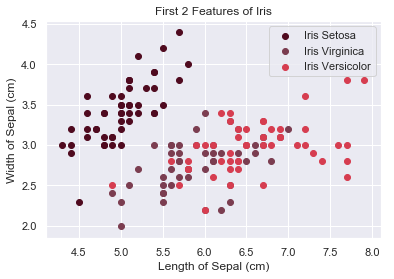

In [256]:
X = iris_X[:,0]               # extract the first column for x-coordinate
y = iris_X[:,1]               # extract the second column for y-coordinate
plot_iris_2D(X, y, iris_y)

The whole goal of k-means is to cluster our data into distinct groups. Looking at the graph, Iris Setosa seems to form a distinct group but the other two are more mixed together. Since we want to form 3 groups, as we have 3 Iris species, we're going to want to use k-means to find 3 cluster centers. When trying to use these centers to classify our data, we take our input (a point) and see which cluster it is the closest to; the winner determines the class of that point.

#### K-Means Time ####
While we're going to use a built in model via sklearn, k-means is pretty simple to implement on your own. In our case, we know we want 3 clusters each representing a class. So, a cluster center is just the mean of all the datapoints for that class.

In [257]:
def k_means(X, num_clusters, fxn=False):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    # if True, return the function, otherwise just return clusters calculated
    if fxn == False:
        return kmeans.cluster_centers_
    else:
        return kmeans
    
print('Cluster Centers: \n{}'.format(k_means(iris_X, 3)))

Cluster Centers: 
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


We clearly have 3 cluster centers (each row) with 4 columns (one per feature). Let's graph what the cluster centers look like on top of our origin data. Again, so we can graph in 2D, we'll only plot the first 2 features.

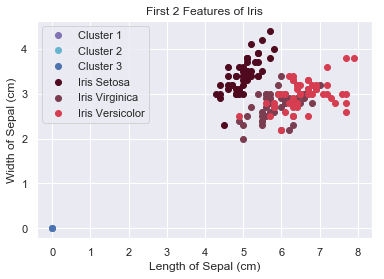

In [258]:
plt.plot(clusters[0][0], clusters[0][1], 'mo', label='Cluster 1')
plt.plot(clusters[1][0], clusters[1][1], 'co', label='Cluster 2')
plt.plot(clusters[2][0], clusters[2][1], 'bo', label='Cluster 3')
plot_iris_2D(iris_X[:,0], iris_X[:,1], iris_y)

The clusters seem to be relatively well positioned in that they should be the 'center' of all the points of that class. Let's move on to now classifying a dataset using just the clusters. Now, when we want to really test the validity of a machine learning model, we generally want to split our dataset into trainign and testing sets where the training is used to fit the model and the testing is used to predict classes that will be compared to the actual ones. However, just in this tutorial we won't do that, but all the others will have it! 

In [259]:
# kmeans predictions on testing data which outputs classes (like iris_y)
predictions = k_means(iris_X, 3, True).predict(iris_X)
print('First 3 classes from our predictions \n{}'.format(predictions[0:3]))

# compare the real classes and our predictions
score = accuracy_score(iris_y, predictions)
print('Test prediction accuracy score: {}'.format(score))

First 3 classes from our predictions 
[1 1 1]
Test prediction accuracy score: 0.24


#### Validation ####
Note: the accuracy will change each time the method is called because it's shuffling the data that goes into training and testing. Overall, we get a pretty bad accuracy. Let's see which class the model is misclassifying the most.

In [260]:
# create an empty array [0,0,0] where the first 0 will hold how many incorrect labels
# we got for class 0, etc.
errors = np.zeros((3,1), float)
counts = np.zeros((3,1), float)     # how many of each class there are

for i in range(0, len(predictions)):
    idx = iris_y[i]
    counts[idx] = counts[idx] + 1
    if(predictions[i] != iris_y[i]):
        errors[idx] = errors[iris_y[i]] + 1

errors = errors / counts
print('Missclassifications: Class 0 ({}), Class 1 ({}), Class 2 ({})'.format(errors[0], errors[1], errors[2]))

Missclassifications: Class 0 ([1.]), Class 1 ([1.]), Class 2 ([0.28])


Clearly, k-means isn't the best for working with this dataset as the cluster centers aren't separating the classes well enough.

---

### MNIST Data ###
Now that we've gotten a basic understanding of k-means and seen that it doesn't perform well on data that clearly isn't that easy to cluster, let's work on image data.

#### Data Visualization ####
Let's gather some information about the shape and type of the MNIST data.

In [261]:
print('MNIST X shape {} and y shape {}'.format(np.shape(digits_X), np.shape(digits_y)))
print('\nPeak at the first 3 rows of MNIST X data')
print(digits_X[0:3,:])
print('\nPeak at the first 3 rows of MNIST y data')
print(digits_y[0:3])

MNIST X shape (1125, 784) and y shape (1125,)

Peak at the first 3 rows of MNIST X data
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Peak at the first 3 rows of MNIST y data
[7. 1. 9.]


Ok so we know have 784 features, 1125 rows of data, and classes that instead of being 0,1,2 to correspond to a species are now the digit we will see in the image. Now, you might be thinking, why are we just getting 0's for our data?! Unlike in the Iris data where we could just use feature 1 as x and feature 2 as y to graph a row as a point (x,y), our MNIST data consists of 784 that correspond to a pixel for an image. Instead of a coordinate, each value is the pixel brightness on a black and white scale. So, shown above, the first and last 3 values are all 0 because it's just the whitespace at the border of the image. To get the real gist for the data, we need to plot it so let's visualize just the first 3 digits below.

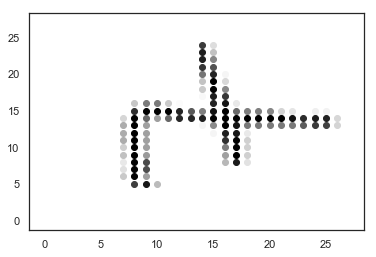

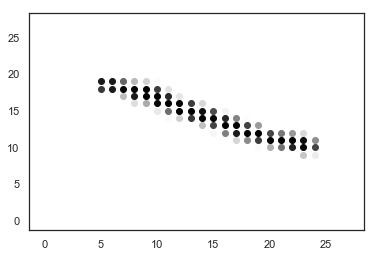

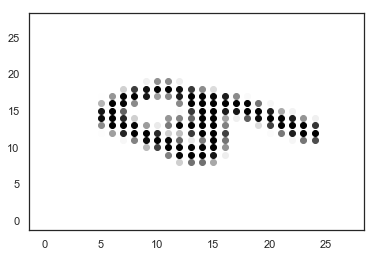

In [262]:
# draws a single number (rotated left)
def draw_digit(row):
    def cal_color(val):
        rgb = 1 - val / 255
        return (rgb, rgb, rgb)

    pixel = 0
    for i in range(0,28):
        for j in range(0,28):
            plt.plot(i,j,'o',color=cal_color(row[pixel]))
            pixel = pixel + 1
    plt.show();
      
sns.set_style('white')
draw_digit(digits_X[0])
draw_digit(digits_X[1])
draw_digit(digits_X[2])

We can see a crude 7, 1, and 9 for the first 3 digits.

#### K-Means Time ####
We're going to mimic what we did for the Iris and find 3 cluster centers once more. But now, instead of finding a single point (x,y) in the center of each cluster, we're going to have to do something different for the MNIST data because we don't have coordinates but brightness values. Instead, our clusters will be an array of length 784 and each value will be the average brightness at that value for all the data of that digit. While we can use a built in model, it's also fairly simple to compute manually so we'll show both ways of doing so below. 

Clusters
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


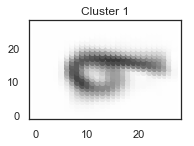

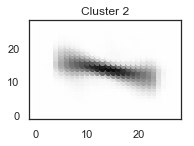

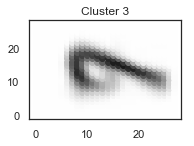

In [263]:
# Use normal k-means functin defined earlier
clusters = k_means(digits_X, 3)
print('Clusters\n{}'.format(clusters))

plt.subplot(2,2,1)
plt.title('Cluster 1')
draw_digit(clusters[0]+1)

plt.subplot(2,2,2)
plt.title('Cluster 2')
draw_digit(clusters[1]+1)

plt.subplot(2,2,3)
plt.title('Cluster 3')
draw_digit(clusters[2]+1)

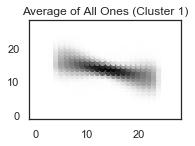

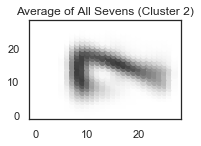

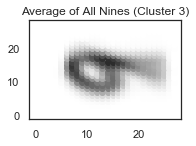

In [264]:
def manual_centers(X_train, classes):
    # even split across all actually (375,784)
    ones = np.empty((0,784), int)
    sevens = np.empty((0,784), int)
    nines = np.empty((0,784), int)

    # divide data into 3 groups
    for r in range(0,len(classes)):
        row = np.reshape(X_train[r,:], (1,784))
        if classes[r] == 1:
            ones = np.append(ones, row, axis=0)
        elif classes[r] == 7:
            sevens = np.append(sevens, row, axis=0)
        else:
            nines = np.append(nines, row, axis=0)

    # compute 'mean' image of each group
    ave_ones = np.mean(ones, axis=0)
    ave_sevens = np.mean(sevens, axis=0)
    ave_nines = np.mean(nines, axis=0)
    ave_all = (ave_ones + ave_sevens + ave_nines) / 3

    # compute 'centroid' of each group
    cluster_ones = np.mean(ave_ones)
    cluster_sevens = np.mean(ave_sevens)
    cluster_nines = np.mean(ave_nines)

    plt.subplot(2,2,1)
    plt.title('Average of All Ones (Cluster 1)')
    draw_digit(ave_ones)

    plt.subplot(2,2,2)
    plt.title('Average of All Sevens (Cluster 2)')
    draw_digit(ave_sevens)

    plt.subplot(2,2,3)
    plt.title('Average of All Nines (Cluster 3)')
    draw_digit(ave_nines)

    plt.show()
    
manual_centers(digits_X, digits_y)

Now given a input of new data, say another row [1 x 784], based off of these clusters, we want the cluster with values as close to our new input to dictate whether it's declared a 1, 7, or 9. To start, let's give our k-means input that it will cluster and then we'll count the proportion of each digit per cluster.

In [265]:
# Bar chart for the % digit per cluster
def plot_proportions(cluster0, cluster1, cluster2):
    sns.set();
    
    digit_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']
    centers = [1,2.5,4]
    x = np.arange(len(digit_labels))
    width = 0.30

    plt.title('Proportions of Digits in Each MNIST Cluster')
    plt.bar(x=centers[0]-width, height=cluster0[0], width=width, color=blue('dark'), label='Ones')
    plt.bar(x=centers[0], height=cluster0[1], width=width, color=blue('medium'), label='Sevens')
    plt.bar(x=centers[0]+width, height=cluster0[2], width=width, color=blue('light'), label='Nines')
    plt.legend()
    plt.bar(x=centers[1]-width, height=cluster1[0], width=width, color=blue('dark'), label='Ones')
    plt.bar(x=centers[1], height=cluster1[1], width=width, color=blue('medium'), label='Sevens')
    plt.bar(x=centers[1]+width, height=cluster1[2], width=width, color=blue('light'), label='Nines')

    plt.bar(x=centers[2]-width, height=cluster2[0], width=width, color=blue('dark'), label='Ones')
    plt.bar(x=centers[2], height=cluster2[1], width=width, color=blue('medium'), label='Sevens')
    plt.bar(x=centers[2]+width, height=cluster2[2], width=width, color=blue('light'), label='Nines')

    plt.xticks(centers, digit_labels)
    plt.ylabel('Counts of each digit')
    plt.show()
    

# calculates the % of each digit per cluster
def cluster_digit_proportion(X_train, classes, title=None):
    cluster0 = [0,0,0,0,0,0,0,0,0,0]  # [num 1s, num 7s, num 9s]
    cluster1 = [0,0,0,0,0,0,0,0,0,0]
    cluster2 = [0,0,0,0,0,0,0,0,0,0]

    clusters, labels = k_means(X_train, 3), k_means(X_train, 3, True).labels_

    # loop through each kmeans label
    # and compare it to its class
    for i in range(0,len(classes)):
        idx = np.int(classes[i])
        if labels[i] == 0:
            cluster0[idx] = cluster0[idx] + 1
        elif labels[i] == 1:
            cluster1[idx] = cluster1[idx] + 1
        else:
            cluster2[idx] = cluster2[idx] + 1

    # remove unused indices 
    for j in (0,1,1,1,1,1,2):
        del cluster0[j]
        del cluster1[j]
        del cluster2[j]

    print('\nProportion of each digit per cluster:')
    s0, s1, s2 = np.sum(cluster0), np.sum(cluster1), np.sum(cluster2)
    ones0, sevens0, nines0 = float(cluster0[0])/float(s0), float(cluster0[1])/float(s0), float(cluster0[2])/float(s0)
    ones1, sevens1, nines1 = float(cluster1[0])/float(s1), float(cluster1[1])/float(s1), float(cluster1[2])/float(s1)
    ones2, sevens2, nines2 = float(cluster2[0])/float(s2), float(cluster2[1])/float(s2), float(cluster2[2])/float(s2)
    print('\nCluster 1 had {} ones, {} sevens, and {} nines'.format(ones0, sevens0, nines0))
    print('\nCluster 2 had {} ones, {} sevens, and {} nines'.format(ones1, sevens1, nines1))
    print('\nCluster 3 had {} ones, {} sevens, and {} nines'.format(ones2, sevens2, nines2))

 
    # graph
    plot_proportions(cluster0, cluster1, cluster2)

#### Validation ####

To determine how the k-means is operating we'll first see the distrubition of digits across each cluster and then do another accuracy score on its predictions. Again, we should be doing accuracy scoring on a testing set but, for the sake of simplicity, we won't in this tutorial.


Proportion of each digit per cluster:

Cluster 1 had 0.00869565217391 ones, 0.330434782609 sevens, and 0.660869565217 nines

Cluster 2 had 0.900485436893 ones, 0.0752427184466 sevens, and 0.0242718446602 nines

Cluster 3 had 0.00271739130435 ones, 0.625 sevens, and 0.372282608696 nines


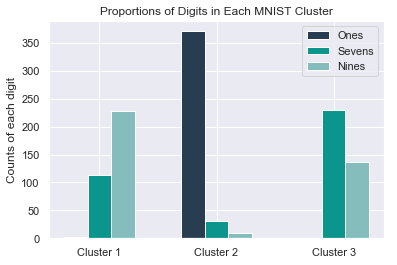

In [266]:
cluster_digit_proportion(digits_X, digits_y)

From this, it's obvious that Cluster 2 contains almost all 1's while Cluster 1 has a majority of 7's and Cluster 3 9's although Cluster 1 and Cluster 3 are less distinct. Note: these clusters may also change as to which hold each digit but the relative distributions of each digit within a cluster should be similar.

In [267]:
predictions = k_means(digits_X, 3, True).predict(digits_X)
print('Prediction accuracy score ({})'.format(accuracy_score(digits_y, predictions)))

Prediction accuracy score (0.329777777778)


Again, k-means doesn't perform very well. However, we typically just want to use k-means to see what the cluster centers are or how many we should be using but they are heavily skewed by outliers. A better way of clustering this data is actually by using KNearestNeighbor classifier. That classifier takes a number of 'neighbors' that will vote as to which new points should belong to their class or not based off of closes distance (sound similar?). We'll explore that in the next tutorial.